<a href="https://colab.research.google.com/github/SiracencoSerghei/DataScienceHW/blob/main/example_kaggle/les_6/les_6_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.io import loadmat

from sklearn.datasets import make_blobs, make_classification

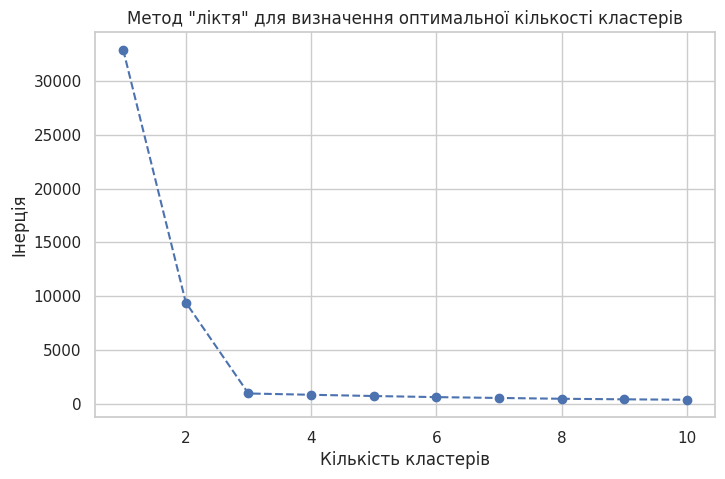

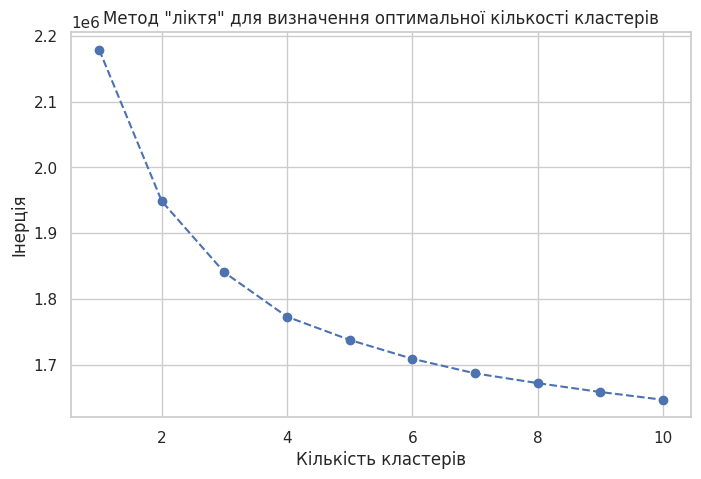

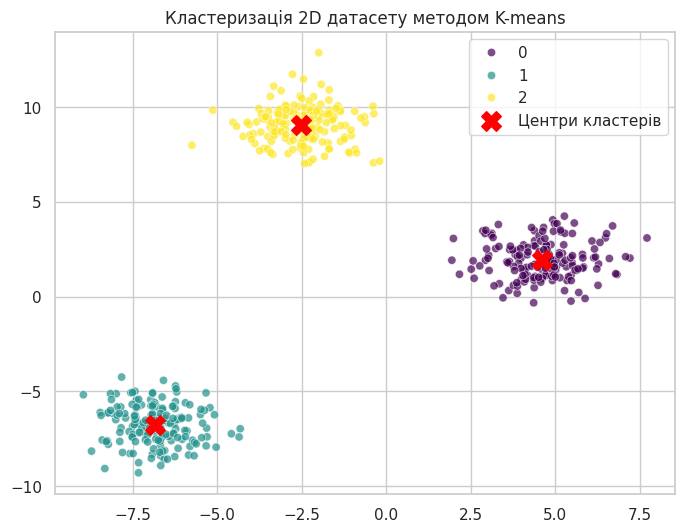

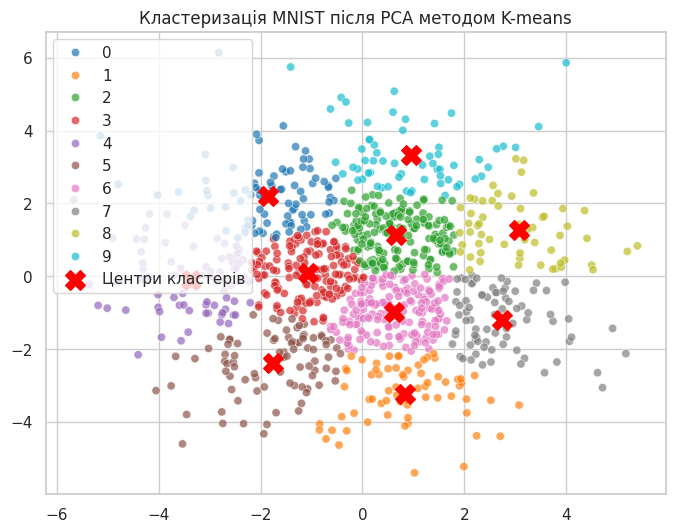

In [4]:
# Налаштування стилю для гарного відображення графіків
sns.set(style="whitegrid")

# Генеруємо фейкові 2D дані (3 кластери)
data_2d, _ = make_blobs(n_samples=500, centers=3, cluster_std=1.0, random_state=42)

# Генеруємо фейкові MNIST-подібні дані (784 фічі, як у 28x28)
data_mnist, _ = make_classification(n_samples=1000, n_features=784, n_informative=50,
                                    n_classes=10, random_state=42)

# Функція для пошуку оптимальної кількості кластерів методом "ліктя"
def plot_elbow_method(data, max_clusters=10):
    distortions = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), distortions, marker='o', linestyle='--', color='b')
    plt.xlabel('Кількість кластерів')
    plt.ylabel('Інерція')
    plt.title('Метод "ліктя" для визначення оптимальної кількості кластерів')
    plt.show()

# Визначення оптимальної кількості кластерів
plot_elbow_method(data_2d)
plot_elbow_method(data_mnist)

# Кластеризація K-means для 2D датасету
kmeans_2d = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_2d.fit(data_2d)
labels_2d = kmeans_2d.labels_

# Візуалізація кластеризації для 2D датасету
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_2d[:, 0], y=data_2d[:, 1], hue=labels_2d, palette='viridis', alpha=0.7)
plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Центри кластерів')
plt.title('Кластеризація 2D датасету методом K-means')
plt.legend()
plt.show()

# Масштабування MNIST перед PCA
scaler = StandardScaler()
data_mnist_scaled = scaler.fit_transform(data_mnist)

# Зменшення розмірності MNIST до 2D за допомогою PCA
pca = PCA(n_components=2)
data_mnist_pca = pca.fit_transform(data_mnist_scaled)

# Кластеризація K-means після PCA
kmeans_mnist = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans_mnist.fit(data_mnist_pca)
labels_mnist = kmeans_mnist.labels_

# Візуалізація кластеризації MNIST після PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_mnist_pca[:, 0], y=data_mnist_pca[:, 1], hue=labels_mnist, palette='tab10', alpha=0.7)
plt.scatter(kmeans_mnist.cluster_centers_[:, 0], kmeans_mnist.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Центри кластерів')
plt.title('Кластеризація MNIST після PCA методом K-means')
plt.legend()
plt.show()